<a href="https://colab.research.google.com/github/Bitdribble/dlwpt-code/blob/master/colab/PyTorchCh5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Temperature model from [Deep Learning With PyTorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf) Chap 5. A thermometer uses an unknown scale. We're trying to determine the units used by the termometer, comparing its readings with those of a 2nd thermometer that uses Celsius scale.

In [ ]:
import torch
import matplotlib.pyplot as plt

In [ ]:
 # Readings in Celsius
 t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
 # Corresponding readings in the unknown scale
 t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
 t_c = torch.tensor(t_c)
 t_u = torch.tensor(t_u)
 t_c, t_u

(tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000, -4.0000,
          6.0000, 13.0000, 21.0000]),
 tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]))

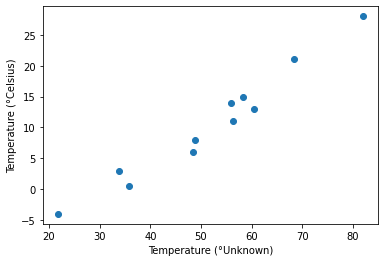

In [ ]:
# Plot the readings.
fig = plt.figure()
plt.xlabel("Temperature (°Unknown)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u, t_c, "o")
plt.show()

We'll try to 'fit a line' though this plot. Other more precise methods are available. Here we're mimicking the DL gradient descent method as illustration for how DL neural nets work.

The model and the loss function are listed below:

In [ ]:
def model(t_u, w, b):
  return w * t_u + b 

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

Initialize the weight and bias. Run the model once, and compute the loss. Compare with the actual measurement.

In [ ]:
w = torch.ones(())
b = torch.zeros(())
t_p = model(t_u, w, b)
t_p

tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
        48.4000, 60.4000, 68.4000])

In [ ]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

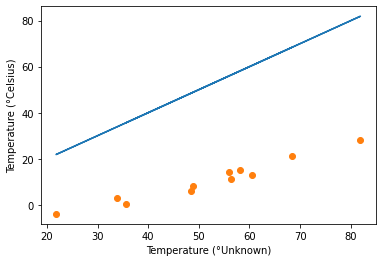

In [ ]:
fig = plt.figure()
plt.xlabel("Temperature (°Unknown)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u, t_p)
plt.plot(t_u, t_c, "o")
plt.show()

**Training using estimate of gradient**

In [ ]:
def train(w, b, n_epochs = 100, learning_rate_w = 1e-4, learning_rate_b = 1, log_epochs = 10):
  delta = 1e-1

  for epoch in range(n_epochs):
    # Estimate d/dw (loss_fn \comp model); update weight
    loss_rate_w = (loss_fn(model(t_u, w + delta, b), t_c) - loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
    w = w - learning_rate_w * loss_rate_w
    # Estimate d/db (loss_fn \comp model); update bias
    loss_rate_b = (loss_fn(model(t_u, w, b + delta), t_c) - loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
    b = b - learning_rate_b * loss_rate_b
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)

    if log_epochs is not 0 and (epoch+1) % log_epochs == 0 or (epoch+1) == n_epochs:
      print(f"Epoch {epoch+1}, w {float(w):.3f}, b {float(b):.3f}, loss_rate_w {float(loss_rate_w):.3f}, loss_rate_b {float(loss_rate_b):.3f}, loss {float(loss):.3f}")
 
  return w, b

#train(w, b, n_epochs=200000, learning_rate_w=1e-4, learning_rate_b=1e-4, log_epochs=10000) # Slow to converge b/c learning rates 
#train(w, b, n_epochs=10, learning_rate_w=1e-3, learning_rate_b=1, log_epochs=1) # w diverges
train(w, b, n_epochs=100, learning_rate_w=1e-4, learning_rate_b=1, log_epochs=10) # Good

Epoch 10, w 0.612, b -21.059, loss_rate_w 55.027, loss_rate_b -0.313, loss 4.420
Epoch 20, w 0.573, b -19.098, loss_rate_w 27.635, loss_rate_b -0.138, loss 3.265
Epoch 30, w 0.554, b -18.160, loss_rate_w 13.179, loss_rate_b -0.066, loss 3.004
Epoch 40, w 0.545, b -17.713, loss_rate_w 6.285, loss_rate_b -0.031, loss 2.945
Epoch 50, w 0.541, b -17.499, loss_rate_w 2.998, loss_rate_b -0.015, loss 2.932
Epoch 60, w 0.539, b -17.398, loss_rate_w 1.429, loss_rate_b -0.007, loss 2.929
Epoch 70, w 0.538, b -17.349, loss_rate_w 0.682, loss_rate_b -0.003, loss 2.928
Epoch 80, w 0.537, b -17.326, loss_rate_w 0.325, loss_rate_b -0.002, loss 2.928
Epoch 90, w 0.537, b -17.315, loss_rate_w 0.155, loss_rate_b -0.001, loss 2.928
Epoch 100, w 0.537, b -17.310, loss_rate_w 0.074, loss_rate_b -0.000, loss 2.928


(tensor(0.5369), tensor(-17.3096))

![](https://drive.google.com/uc?export=view&id=1lz1NknfgDa2vHEm5Z15HFpldtbw3m3GM)

Epoch 10, w 0.612, b -21.059, loss_rate_w 55.027, loss_rate_b -0.313, loss 4.420
Epoch 20, w 0.573, b -19.098, loss_rate_w 27.635, loss_rate_b -0.138, loss 3.265
Epoch 30, w 0.554, b -18.160, loss_rate_w 13.179, loss_rate_b -0.066, loss 3.004
Epoch 40, w 0.545, b -17.713, loss_rate_w 6.285, loss_rate_b -0.031, loss 2.945
Epoch 50, w 0.541, b -17.499, loss_rate_w 2.998, loss_rate_b -0.015, loss 2.932
Epoch 60, w 0.539, b -17.398, loss_rate_w 1.429, loss_rate_b -0.007, loss 2.929
Epoch 70, w 0.538, b -17.349, loss_rate_w 0.682, loss_rate_b -0.003, loss 2.928
Epoch 80, w 0.537, b -17.326, loss_rate_w 0.325, loss_rate_b -0.002, loss 2.928
Epoch 90, w 0.537, b -17.315, loss_rate_w 0.155, loss_rate_b -0.001, loss 2.928
Epoch 100, w 0.537, b -17.310, loss_rate_w 0.074, loss_rate_b -0.000, loss 2.928


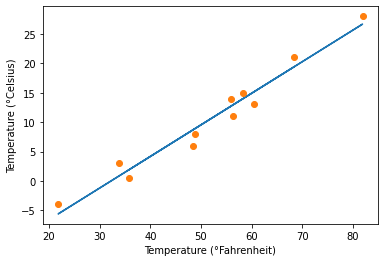

In [ ]:
w1, b1 = train(w, b, n_epochs=100, learning_rate_w=1e-4, learning_rate_b=1, log_epochs=10)
t_p = w1 * t_u + b1

fig = plt.figure()
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u, t_p)
plt.plot(t_u, t_c, "o")
plt.show()

**Training using analytic gradient computation**

In [ ]:
def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

def dmodel_dw(t_u, w, b):
  return t_u

def dmodel_db(t_u, w, b):
  return 1.0

# Recall that t_p = model(t_u), fn(t_u) = loss(model(t_u)) = loss(t_p)
def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])

def train_grad(params=torch.tensor([1.0, 0.0]), n_epochs=100, 
               learning_rate=1e-4, log_epochs=0):
  for epoch in range(n_epochs):
    w, b = params
    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w, b)
    params = params - learning_rate * grad

    if not torch.isfinite(loss).all():
      print("Infinite loss")
      break

    if log_epochs is not 0 and (epoch+1) % log_epochs == 0 or (epoch+1) == n_epochs:
      print(f"Epoch {epoch+1}, w {w:.3f}, b {b:.3f}, grad ({grad[0]:.3f}, {grad[1]:.3f}), loss {float(loss):.3f}")
  return params

# train_grad(n_epochs=10, learning_rate=1e-3, log_epochs=1) # Diverges
# train_grad(n_epochs=200000, learning_rate=torch.tensor([1e-4, 1e-4]), log_epochs=20000) # Slow to converge
train_grad(n_epochs=200, learning_rate=torch.tensor([1e-4, 1e-1]), log_epochs=20) # Good

Epoch 20, w 0.442, b -12.062, grad (-12.562, 0.697), loss 5.348
Epoch 40, w 0.464, b -13.293, grad (-9.612, 0.533), loss 4.345
Epoch 60, w 0.481, b -14.236, grad (-7.354, 0.408), loss 3.757
Epoch 80, w 0.494, b -14.956, grad (-5.627, 0.312), loss 3.413
Epoch 100, w 0.504, b -15.508, grad (-4.305, 0.239), loss 3.212
Epoch 120, w 0.512, b -15.930, grad (-3.294, 0.183), loss 3.094
Epoch 140, w 0.518, b -16.253, grad (-2.521, 0.140), loss 3.025
Epoch 160, w 0.522, b -16.500, grad (-1.929, 0.107), loss 2.985
Epoch 180, w 0.526, b -16.689, grad (-1.476, 0.082), loss 2.961
Epoch 200, w 0.528, b -16.834, grad (-1.129, 0.063), loss 2.947


tensor([  0.5284, -16.8398])

Epoch 200, w 0.528, b -16.834, grad (-1.129, 0.063), loss 2.947


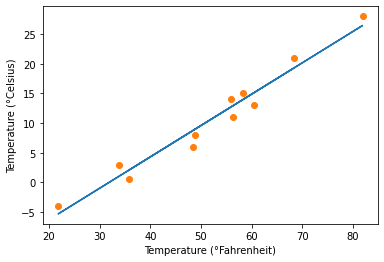

In [ ]:
params = train_grad(n_epochs=200, learning_rate=torch.tensor([1e-4, 1e-1]), log_epochs=0)
t_p = model(t_u, *params)
fig = plt.figure()
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u, t_p)
plt.plot(t_u, t_c, "o")
plt.show()

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
params.grad is None

True

In [ ]:
loss = loss_fn(model(t_u, *params), t_c)
loss.backward()
params.grad

tensor([4517.2969,   82.6000])

**Training using Torch backward pass to compute the gradient**

In [ ]:
def train_backward(params=torch.tensor([1.0, 0.0], requires_grad=True), n_epochs=100, 
                   learning_rate=1e-4, log_epochs=0):
  for epoch in range(n_epochs):
    if params.grad is not None:
      params.grad.zero_() # Reset the gradient
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c) # Compute function (Forward pass)
    loss.backward() # Compute gradient (Backward pass)
    with torch.no_grad():
      params -= learning_rate * params.grad # Update in place

    w, b = params
    grad = params.grad
    if log_epochs is not 0 and ((epoch+1) % log_epochs == 0 or (epoch+1) == n_epochs):
      print(f"Epoch {epoch+1}, w {w:.3f}, b {b:.3f}, grad ({grad[0]:.3f}, {grad[1]:.3f}), loss {float(loss):.3f}")

  return params

#train_backward(n_epochs=10, learning_rate=1e-3, log_epochs=1) # Diverges
#train_backward(n_epochs=200000, learning_rate=torch.tensor([1e-4, 1e-4]), log_epochs=20000) # Slow to converge
train_backward(n_epochs=200, learning_rate=torch.tensor([1e-4, 1e-1]), log_epochs=20) # Good

Epoch 20, w 0.444, b -12.132, grad (-12.562, 0.697), loss 5.348
Epoch 40, w 0.465, b -13.347, grad (-9.612, 0.533), loss 4.345
Epoch 60, w 0.482, b -14.276, grad (-7.354, 0.408), loss 3.757
Epoch 80, w 0.495, b -14.988, grad (-5.627, 0.312), loss 3.413
Epoch 100, w 0.505, b -15.532, grad (-4.305, 0.239), loss 3.212
Epoch 120, w 0.512, b -15.948, grad (-3.294, 0.183), loss 3.094
Epoch 140, w 0.518, b -16.267, grad (-2.521, 0.140), loss 3.025
Epoch 160, w 0.522, b -16.511, grad (-1.929, 0.107), loss 2.985
Epoch 180, w 0.526, b -16.697, grad (-1.476, 0.082), loss 2.961
Epoch 200, w 0.528, b -16.840, grad (-1.129, 0.063), loss 2.947


tensor([  0.5284, -16.8398], requires_grad=True)

![](https://drive.google.com/uc?export=view&id=1CDAVipUc4jjKNUF1MA_7cN6Db8F-mTAP)

**Using optimizers**

In [ ]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

**Using the optimizer for one step**

In [ ]:
params = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) # Stochastic gradient descent optimizer
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
optimizer.zero_grad() # Optimizer needs to zero out its gradient before backward pass!
loss.backward()
optimizer.step()

params

tensor([-44.1730,  -0.8260], requires_grad=True)

**Training using backward pass and SGD or Adam optimizer**

In [ ]:
def train_backward_optim(n_epochs, optimizer, params, log_epochs=0):
  for epoch in range(n_epochs):
    if params.grad is not None:
      params.grad.zero_() # Reset the gradient
    t_p = model(t_u, *params)
    loss = loss_fn(t_p, t_c) # Compute function (Forward pass)
    optimizer.zero_grad()
    loss.backward() # Compute gradient (Backward pass)
    optimizer.step()

    w, b = params
    grad = params.grad
    if log_epochs is not 0 and ((epoch+1) % log_epochs == 0 or (epoch+1) == n_epochs):
      print(f"Epoch {epoch+1}, w {w:.3f}, b {b:.3f}, grad ({grad[0]:.3f}, {grad[1]:.3f}), loss {float(loss):.3f}")

  return params

params=torch.tensor([1.0, 0.0], requires_grad=True)

#train_backward_optim(n_epochs=10, optimizer=optim.SGD([params],lr=1e-3), params=params, log_epochs=1) # Diverges
#train_backward_optim(n_epochs=200000, optimizer=optim.SGD([params],lr=1e-4), params=params, log_epochs=20000) # Slow to converge
train_backward_optim(n_epochs=2000, optimizer=optim.Adam([params],lr=1e-1), params=params, log_epochs=200) # Good

Epoch 200, w 0.298, b -3.744, grad (-2.115, 2.342), loss 19.082
Epoch 400, w 0.373, b -8.022, grad (-1.508, 1.603), loss 10.508
Epoch 600, w 0.439, b -11.754, grad (-0.895, 0.959), loss 5.641
Epoch 800, w 0.485, b -14.389, grad (-0.469, 0.504), loss 3.678
Epoch 1000, w 0.513, b -15.963, grad (-0.216, 0.232), loss 3.087
Epoch 1200, w 0.527, b -16.767, grad (-0.086, 0.093), loss 2.953
Epoch 1400, w 0.534, b -17.119, grad (-0.029, 0.032), loss 2.931
Epoch 1600, w 0.536, b -17.250, grad (-0.009, 0.009), loss 2.928
Epoch 1800, w 0.537, b -17.291, grad (-0.001, 0.002), loss 2.928
Epoch 2000, w 0.537, b -17.302, grad (-0.001, 0.000), loss 2.928


tensor([  0.5367, -17.3021], requires_grad=True)

Every optimizer constructor takes a list of parameters (aka PyTorch tensors, typically with `requires_grad` set to `True`) as the first input. All parameters passed to the optimizer are retained inside the optimizer object so the optimizer can update their values and access their grad attribute

![](https://drive.google.com/uc?export=view&id=1uKGa7WzCsoAxF9JN3El9qKmk2k9E77XN)

Each  optimizer  exposes  two  methods:  `zero_grad`  and  step.  `zero_grad`  zeroes  the grad attribute of all the parameters passed to the optimizer upon construction. step updates  the  value  of  those  parameters  according  to  the  optimization  strategy  implemented by the specific optimizer.

Blog post: [optim.Adam vs optim.SGD,  let’s dive in](https://medium.com/@Biboswan98/optim-adam-vs-optim-sgd-lets-dive-in-8dbf1890fbdc)

